In [1]:
import scipy.io
import numpy as np
from scipy import stats
import pandas as pd
import nibabel as nb
from scipy import stats


In [2]:
working_memory_subjects = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/working_memory/HCP_WM_Place_Data.mat')

In [3]:
subjects_id = working_memory_subjects['IDs']

In [4]:
subjects_id.shape

(1, 1076)

In [5]:
subjects_id = subjects_id.squeeze(0)

In [6]:
subjects_id.shape

(1076,)

In [7]:
subjects_data = working_memory_subjects['DD']

In [8]:
subjects_data.shape

(91282, 1076)

# mean activity FPPs in each subjects

In [9]:
FPPs = {}
for i in range(5):
    FPPs[i] = nb.load(f'E:/FPP_files_and_codes/FPP_files/FPPs_Uncombined/cifti_format/FPP{i+1}.dscalar.nii').get_fdata()[0]

In [10]:
working_memory_subjects_prefered = subjects_data[0:FPPs[0].shape[0]]

In [11]:
working_memory_subjects_prefered.shape

(59412, 1076)

In [12]:
mean_activity_subjects_in_FPPs = np.zeros((5, 1076))
for i in range(5):
    mean_activity_subjects_in_FPPs[i] = np.mean(working_memory_subjects_prefered[FPPs[i].astype(bool),:], axis=0)

In [14]:
mean_subjects_in_FPPs = np.mean(mean_activity_subjects_in_FPPs, axis=1)
sem_subjects_in_FPPs = stats.sem(mean_activity_subjects_in_FPPs, axis=1)

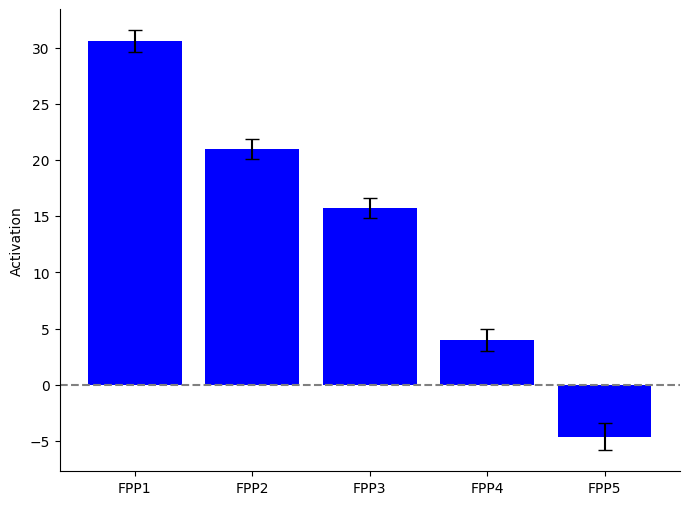

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'

x = np.arange(1, 6)

ax.bar(x, mean_subjects_in_FPPs, yerr=sem_subjects_in_FPPs, capsize=5, color='blue')
ax.set_ylabel('Activation')
ax.set_xticks(x, labels=['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5'])
ax.axhline(0, color='gray', linestyle='--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('E:/FPP_files_and_codes/Figures/Figure5_files/panel_B/working_memory_in_FPPs.png', dpi=1200, bbox_inches='tight')
plt.show()

In [59]:
mean_subjects_in_FPPs - sem_subjects_in_FPPs

array([29.63756542, 20.0613361 , 14.82147037,  2.9908085 , -5.83463372])

# Reading behavioral data

In [16]:
behavioral_data = pd.read_csv('E:/FPP_files_and_codes/FPP_files/behavioral_analysis/behavioral_data.csv')

In [17]:
behavioral_data_subjects  = behavioral_data[behavioral_data['Subject'].isin(subjects_id)]

In [18]:
behavioral_data_subjects

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,992774,Q2,Q02,M,31-35,True,2,2,4,100.0,...,8.4,122.25,111.41,4.0,50.1,107.17,103.55,1.76,0.0,1.76
1202,993675,S900,Q09,F,26-30,True,2,2,4,100.0,...,0.4,122.25,110.45,0.0,38.6,84.07,84.25,1.80,1.0,1.76
1203,994273,S500,Q06,M,26-30,True,1,1,4,100.0,...,6.0,122.25,111.41,7.0,63.8,110.65,109.73,1.80,1.0,1.76
1204,995174,S1200,Q13,M,22-25,False,1,1,2,0.0,...,3.6,88.61,64.58,3.0,50.1,117.16,117.40,1.80,0.0,1.80


In [19]:
accuracy_WM_task_subjects = behavioral_data_subjects['WM_Task_2bk_Place_Acc']

In [20]:
accuracy_WM_task_subjects = np.array(accuracy_WM_task_subjects)

In [21]:
np.isnan(accuracy_WM_task_subjects).sum()

9

In [22]:
mean_activity_subjects_in_FPPs.shape

(5, 1076)

In [23]:
mean_activity_subjects_in_FPPs = mean_activity_subjects_in_FPPs[:,~np.isnan(accuracy_WM_task_subjects)]

In [24]:
mean_activity_subjects_in_FPPs.shape

(5, 1067)

In [25]:
accuracy_WM_task_subjects = accuracy_WM_task_subjects[~np.isnan(accuracy_WM_task_subjects)]

In [26]:
accuracy_WM_task_subjects.shape

(1067,)

In [27]:
accuracy_WM_task_subjects.shape

(1067,)

In [28]:
FPPs_corr_with_behavioral_data = np.zeros(5)
pval_FPPs_corr_with_behavioral_data = np.zeros(5)
for i,mean_activity_FPP in enumerate(mean_activity_subjects_in_FPPs):
    FPPs_corr_with_behavioral_data[i],pval_FPPs_corr_with_behavioral_data[i] = stats.pearsonr(mean_activity_FPP, accuracy_WM_task_subjects)

In [29]:
FPPs_corr_with_behavioral_data

array([0.21456085, 0.20368929, 0.15775297, 0.08270617, 0.01647821])

In [110]:
pval_FPPs_corr_with_behavioral_data * 5

array([7.05047519e-12, 9.32395807e-11, 1.11289137e-06, 3.43522147e-02,
       2.95403937e+00])

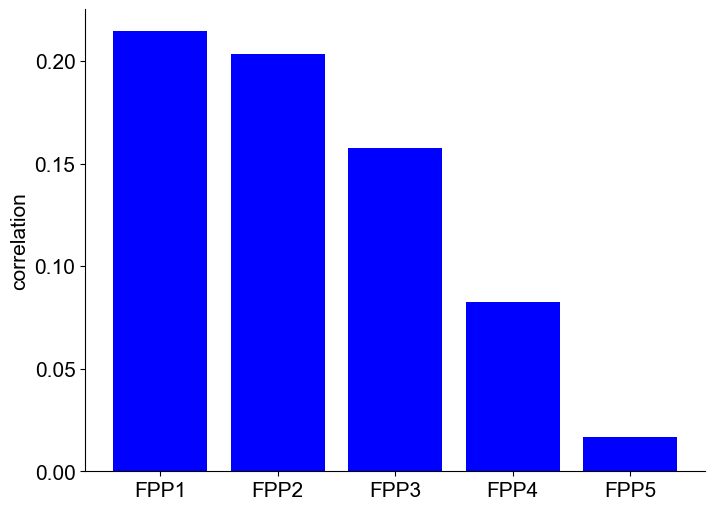

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'

x = np.arange(1, 6)

ax.bar(x, FPPs_corr_with_behavioral_data, capsize=5, color='blue')
ax.set_ylabel('correlation')
ax.set_xticks(x, labels=['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5'])
# ax.axhline(0, color='gray', linestyle='--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [85]:
mean_subjects_in_FPPs - sem_subjects_in_FPPs

array([29.63756542, 20.0613361 , 14.82147037,  2.9908085 , -5.83463372])

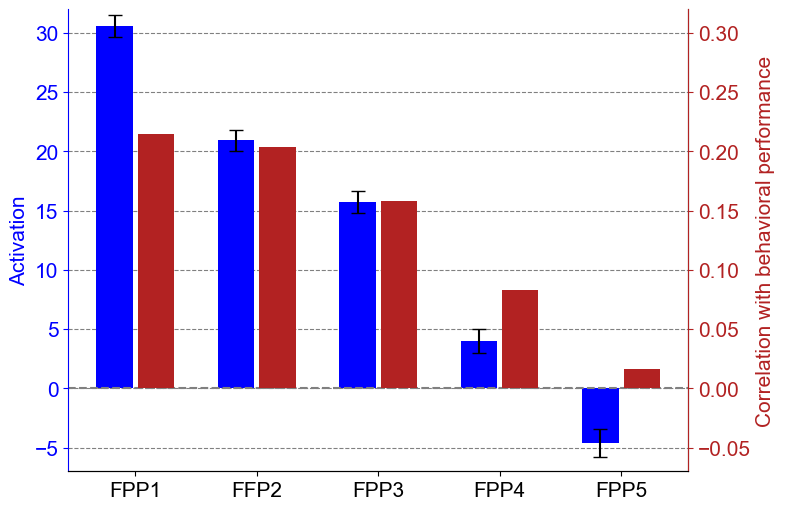

In [109]:
x = np.arange(5)

fig, ax1 = plt.subplots(figsize=(8, 6))
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'

# Create a second y-axis
ax2 = ax1.twinx()

# Bar width
width = 0.3

# Plotting the bars with a little space between them
ax1.bar(x - width/2 - 0.02 , mean_subjects_in_FPPs, yerr=sem_subjects_in_FPPs, width=width, capsize=5, color='blue',align='center')
ax2.bar(x + width/2 + 0.02, FPPs_corr_with_behavioral_data, width=width, color='firebrick', align='center')
ax2.set_ylim(-0.07, 0.32)
ax1.set_ylim(-70, 32)

def sync_y_axes(ax1, ax2, scale_factor):
    y1min, y1max = ax1.get_ylim()
    ax2.set_ylim(y1min * scale_factor, y1max * scale_factor)

scale_factor = 100
sync_y_axes(ax2, ax1, scale_factor)

# Change the color of the y-axis tick parameters and spine for ax2
ax2.tick_params(axis='y', colors='firebrick')
ax2.spines['right'].set_color('firebrick')

ax1.tick_params(axis='y', colors='blue')
ax1.spines['left'].set_color('blue')

ax1.set_ylabel('Activation', color='blue')
ax2.set_ylabel('Correlation with behavioral performance', color='firebrick')

ax1.set_xticks(x)
ax1.set_xticklabels(['FPP1', 'FFP2', 'FPP3', 'FPP4', 'FPP5'])  
ax1.axhline(0, color='grey', linestyle='--')
# ax2.axhline(0, color='grey', linestyle='--')

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# ax1.spines['left'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')

plt.savefig('E:/FPP_files_and_codes/Figures/Figure5_files/panel_B/working_memory_in_FPPs.png', dpi=1200, bbox_inches='tight')
plt.show()
